In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

Fetching Datasets

In [2]:
# Fetching Dataset-1
df1 = pd.read_csv('EVStats.csv')
df1.head()

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Meghalaya,0,0,0,0,0,6,0,6
1,2,Nagaland,0,20,3,0,0,1,0,24
2,3,Manipur,16,8,11,0,5,12,0,52
3,4,Tripura,28,9,36,0,0,8,0,81
4,5,Andaman & Nicobar islands,0,0,0,0,0,82,0,82


In [3]:
# Shape of Dataset1
df1.shape

(30, 10)

In [4]:
# Fetching Dataset-2
df2 = pd.read_csv('behavioural_segment_data.csv')
df2.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [5]:
# Shape of Dataset2
df2.shape

(99, 8)

Exploratory Data Analysis(EDA)
Analysing The datasets

In [6]:
# checking info
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Sl. No                                                              30 non-null     int64 
 1   State                                                               30 non-null     object
 2   Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules  30 non-null     int64 
 3   Two Wheelers (Category L2 (CMVR))                                   30 non-null     int64 
 4   Two Wheelers (Max power not exceeding 250 Watts)                    30 non-null     int64 
 5   Three Wheelers (Category L5 slow speed as per CMVR)                 30 non-null     int64 
 6   Three Wheelers (Category L5 as per CMVR)                            30 non-null     int64 
 7   Passenger Cars (Category M1 

In [7]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   Total Salary      99 non-null     int64 
 7   Price             99 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.3+ KB
None


In [8]:
# Getting a statistical summary of the datasets
d1 = df1.describe()
d2 = df2.describe()

In [9]:
display('Dataset 1',d1)

'Dataset 1'

,Sl. No,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,918.300000,468.966667,3751.266667,12.966667,24.000000,3519.033333,0.900000,8695.433333
std,8.803408,1482.441466,625.711098,4383.917198,30.737468,41.484521,4860.187299,3.835856,9911.814513
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000
25%,8.250000,19.000000,18.500000,65.000000,0.000000,0.000000,222.250000,0.000000,589.500000
50%,15.500000,447.500000,222.500000,2113.000000,0.000000,0.500000,985.500000,0.000000,4206.000000
75%,22.750000,762.500000,706.250000,5003.750000,6.000000,33.750000,5303.250000,0.000000,13951.500000
max,30.000000,7182.000000,2355.000000,15199.000000,117.000000,139.000000,19129.000000,21.000000,34013.000000


In [10]:
display('Dataset2',d2)

'Dataset2'

,Age,No of Dependents,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,2.270707e+06,1.194040e+06
std,6.246054,1.335265,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.700000e+06,1.500000e+06
max,51.000000,4.000000,5.200000e+06,3.000000e+06


Analysis of 2-wheelers EVs
# Conclusions
1.Gujarat has highest number of EV :2 wheelers(L1 and L2) followed by Haryana,Uttar Pradesh and Maharastra and least numbers in Meghalaya, Andaman & Nicobar, Goa and Himachal Pradesh.
2. Uttar Pradesh has highest  number of EV: 2 wheelers(L2) followed by Maharastra, Haryana and Rajasthan and least numbers in Meghalaya, Andaman & Nicobar, Goa and Himachal Pradesh.
3.Uttar Pradesh has highest number of EV: Two Wheelers (Max power not exceeding 250 Watts) followed by Haryana, West Bengal and Maharastra and least numbers in Meghalaya, Andaman & Nicobar, Goa and Himachal Pradesh.

C:\Users\Admin\AppData\Local\Temp\ipykernel_14600\3724075972.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x = df1['State'].sort_values(ascending=True), y='Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules', palette='viridis')


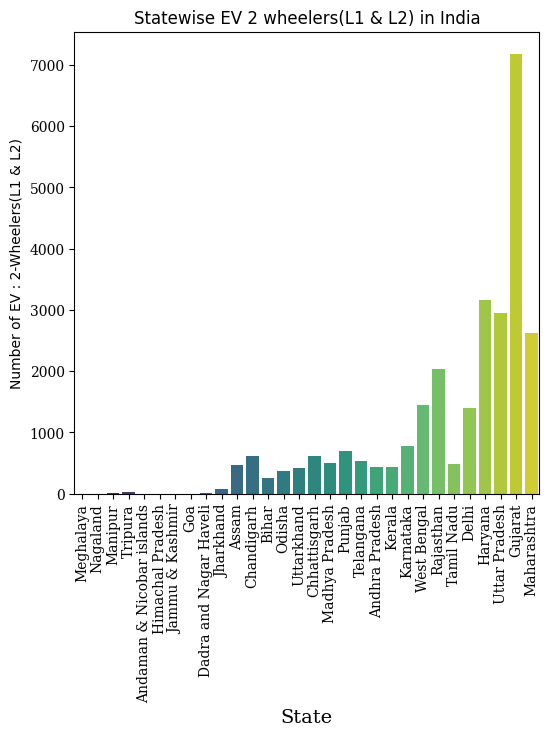

In [11]:
# Data visualization of Two wheelers (L1&L2) 
plt.figure(figsize=(6,6))
sns.barplot(data=df1, x = df1['State'].sort_values(ascending=True), y='Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules', palette='viridis')
plt.xlabel('State', fontsize=14, family= 'serif')
plt.ylabel('Number of EV : 2-Wheelers(L1 & L2)')
plt.xticks(rotation=90,family= 'serif')
plt.yticks(family= 'serif')
plt.title(label='Statewise EV 2 wheelers(L1 & L2) in India')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14600\3011820133.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x = df1['State'].sort_values(ascending=True), y='Two Wheelers (Category L2 (CMVR))', palette='viridis')


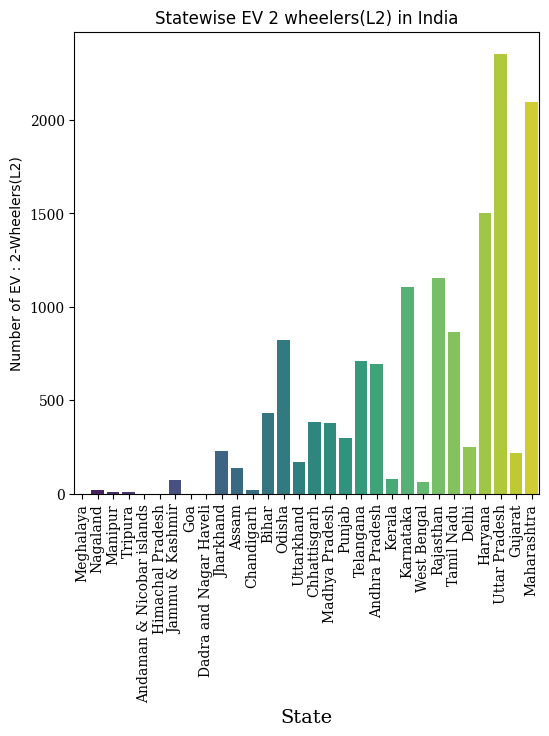

In [12]:
# Data visualization of Two wheelers (L2) 
plt.figure(figsize=(6,6))
sns.barplot(data=df1, x = df1['State'].sort_values(ascending=True), y='Two Wheelers (Category L2 (CMVR))', palette='viridis')
plt.xlabel('State', fontsize=14, family= 'serif')
plt.ylabel('Number of EV : 2-Wheelers(L2)')
plt.xticks(rotation=90,family= 'serif')
plt.yticks(family= 'serif')
plt.title(label='Statewise EV 2 wheelers(L2) in India')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14600\3193222659.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x = df1['State'].sort_values(ascending=True), y='Two Wheelers (Max power not exceeding 250 Watts)', palette='viridis')


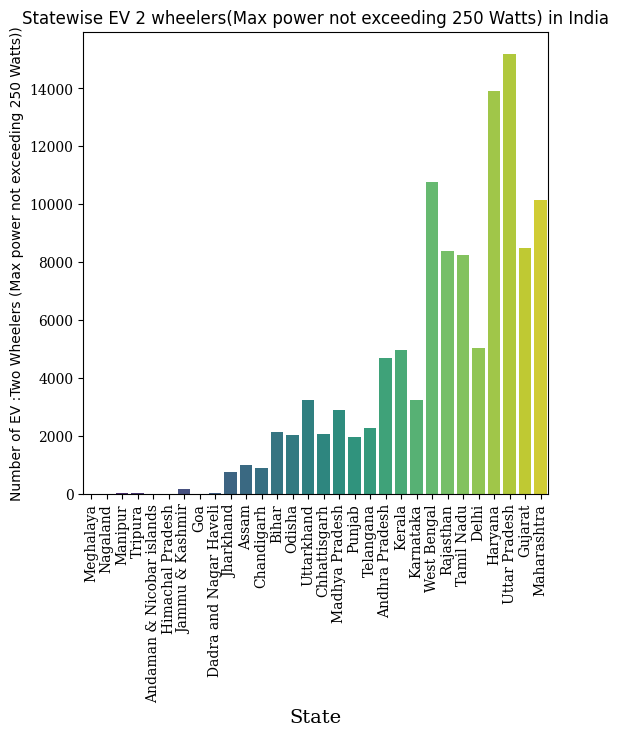

In [13]:

# Data visualization of Two wheelers (Max power not exceeding 250 Watts) 
plt.figure(figsize=(6,6))
sns.barplot(data=df1, x = df1['State'].sort_values(ascending=True), y='Two Wheelers (Max power not exceeding 250 Watts)', palette='viridis')
plt.xlabel('State', fontsize=14, family= 'serif')
plt.ylabel('Number of EV :Two Wheelers (Max power not exceeding 250 Watts))')
plt.xticks(rotation=90,family= 'serif')
plt.yticks(family= 'serif')
plt.title(label='Statewise EV 2 wheelers(Max power not exceeding 250 Watts) in India')
plt.show()

Analysis of 3-wheelers EVs
# Conclusions 
1. The highest number of EV three wheelers(Slow Speed) are in Uttar Pradesh followed by Haryana, Uttrakhand and Chattisgarh and 
least numbers in Meghalaya, Himachal Pradesh, Andaman & Nicobar , Goa.
2.The highest number of EV three wheelers(L5) are in Uttar Pradesh followed by Assam, Madhya Pradesh and Chattisgarh and
least numbers in Meghalaya, Himachal Pradesh, Andaman & Nicobar , Goa.


C:\Users\Admin\AppData\Local\Temp\ipykernel_14600\353082722.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x = df1['State'].sort_values(ascending=True), y='Three Wheelers (Category L5 slow speed as per CMVR)', palette='viridis')


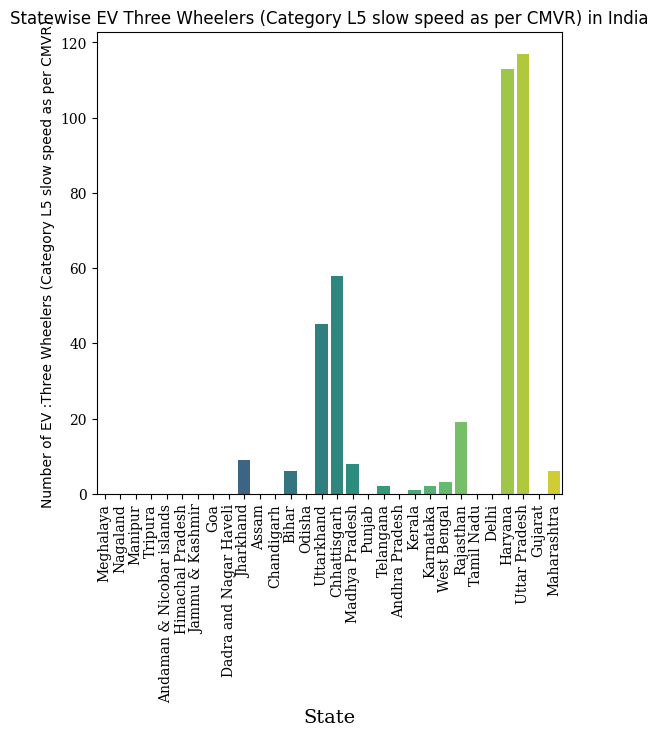

In [14]:
# Data Visualization of Three wheelers
plt.figure(figsize=(6,6))
sns.barplot(data=df1, x = df1['State'].sort_values(ascending=True), y='Three Wheelers (Category L5 slow speed as per CMVR)', palette='viridis')
plt.xlabel('State', fontsize=14, family= 'serif')
plt.ylabel('Number of EV :Three Wheelers (Category L5 slow speed as per CMVR)')
plt.xticks(rotation=90,family= 'serif')
plt.yticks(family= 'serif')
plt.title(label='Statewise EV Three Wheelers (Category L5 slow speed as per CMVR) in India')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14600\2994549387.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x = df1['State'].sort_values(ascending=True), y='Three Wheelers (Category L5 as per CMVR)', palette='viridis')


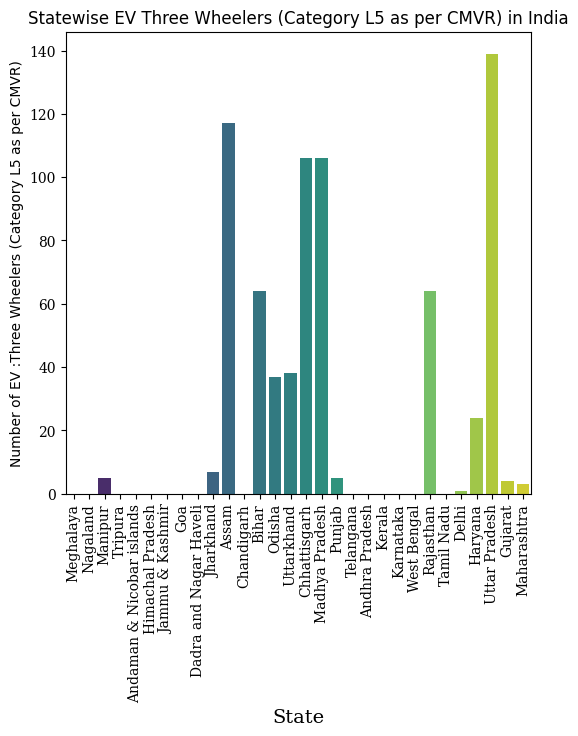

In [15]:
# Data Visualization of Three wheelers
plt.figure(figsize=(6,6))
sns.barplot(data=df1, x = df1['State'].sort_values(ascending=True), y='Three Wheelers (Category L5 as per CMVR)', palette='viridis')
plt.xlabel('State', fontsize=14, family= 'serif')
plt.ylabel('Number of EV :Three Wheelers (Category L5 as per CMVR)')
plt.xticks(rotation=90,family= 'serif')
plt.yticks(family= 'serif')
plt.title(label='Statewise EV Three Wheelers (Category L5 as per CMVR) in India')
plt.show()

Analysis of EV Passenger Cars
# Conclusions 
1. The highest number of EV Passenger Cars are in Maharastra followed by Gujarat, Delhi and Karnataka
least numbers in Nagaland, Meghalaya, Tripura.


C:\Users\Admin\AppData\Local\Temp\ipykernel_14600\2794110273.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x = df1['State'].sort_values(ascending=True), y='Passenger Cars (Category M1 as per CMVR)', palette='viridis')


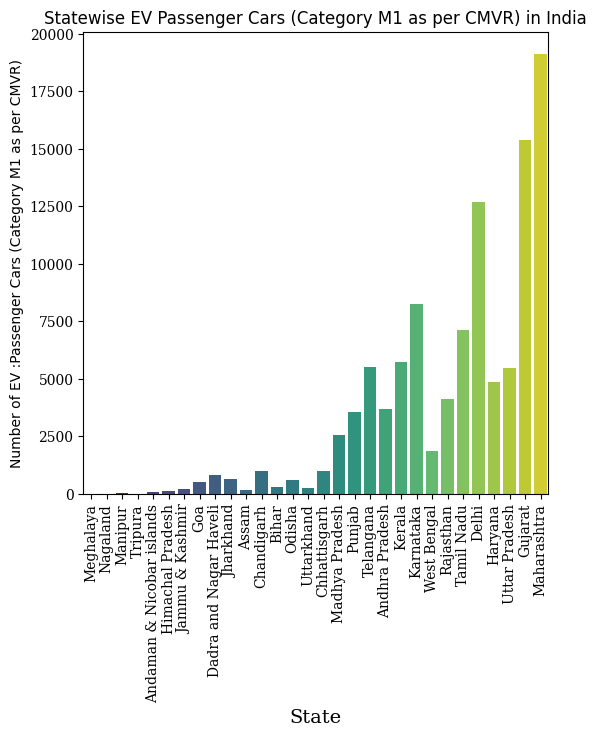

In [16]:
# Data Visualization of Passenger Cars (Category M1 as per CMVR)	
plt.figure(figsize=(6,6))
sns.barplot(data=df1, x = df1['State'].sort_values(ascending=True), y='Passenger Cars (Category M1 as per CMVR)', palette='viridis')
plt.xlabel('State', fontsize=14, family= 'serif')
plt.ylabel('Number of EV :Passenger Cars (Category M1 as per CMVR)')
plt.xticks(rotation=90,family= 'serif')
plt.yticks(family= 'serif')
plt.title(label='Statewise EV Passenger Cars (Category M1 as per CMVR) in India')
plt.show()

Analysis of EV Buses
# Conclusions 
1. The highest number of EV Buses are in Delhi followed by Maharastra also only a few states has EV buses. 


C:\Users\Admin\AppData\Local\Temp\ipykernel_14600\838795051.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x = df1['State'].sort_values(ascending=True), y='Buses', palette='viridis')


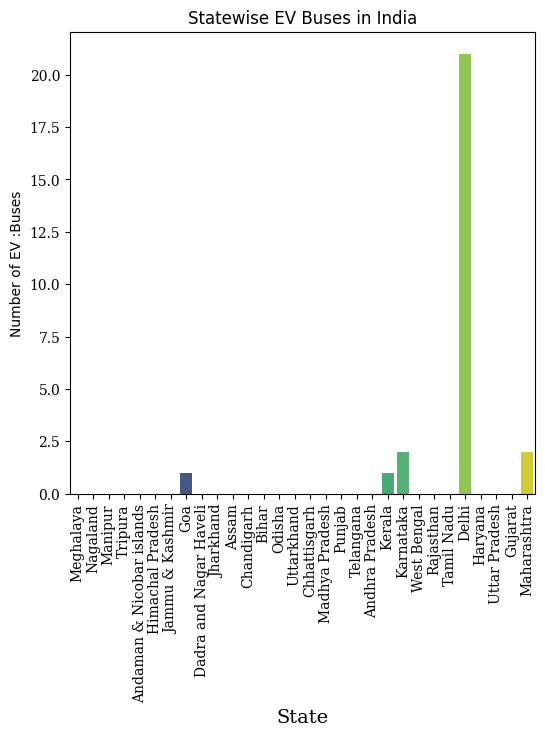

In [17]:
# Data Visualization of Buses	
plt.figure(figsize=(6,6))
sns.barplot(data=df1, x = df1['State'].sort_values(ascending=True), y='Buses', palette='viridis')
plt.xlabel('State', fontsize=14, family= 'serif')
plt.ylabel('Number of EV :Buses')
plt.xticks(rotation=90,family= 'serif')
plt.yticks(family= 'serif')
plt.title(label='Statewise EV Buses in India')
plt.show()

Analysis of Total EV in State
# Conclusions 
1. The highest number of total EVs are in Maharastra followed by Gujarat, Uttar Pradesh and Haryana and least number of total EVS are in Meghalaya, Nagaland, Manipur.

C:\Users\Admin\AppData\Local\Temp\ipykernel_14600\2466019050.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x = df1['State'].sort_values(ascending=True), y='Total in state', palette='viridis')


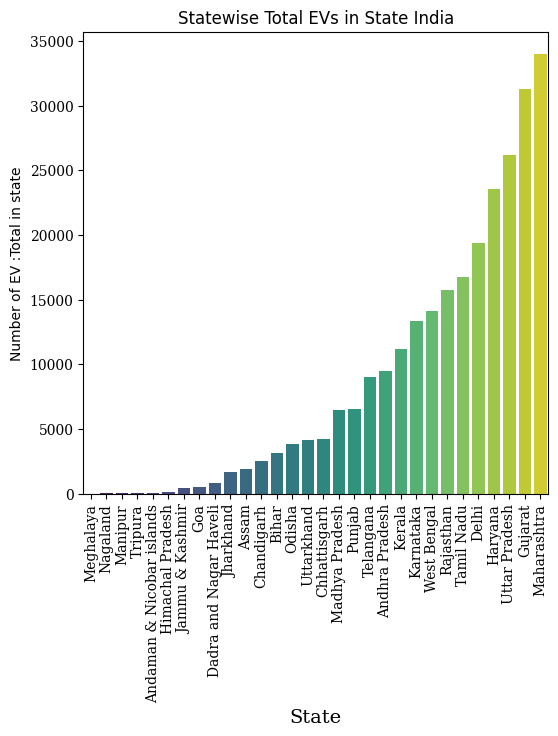

In [18]:
# Data Visualization of Total EV in State	
plt.figure(figsize=(6,6))
sns.barplot(data=df1, x = df1['State'].sort_values(ascending=True), y='Total in state', palette='viridis')
plt.xlabel('State', fontsize=14, family= 'serif')
plt.ylabel('Number of EV :Total in state')
plt.xticks(rotation=90,family= 'serif')
plt.yticks(family= 'serif')
plt.title(label='Statewise Total EVs in State India')
plt.show()

Behavioural segment data Analysis 
# Conclusions
Salaried persons are more than the persons pursuing business that too in the age of 30-40 years.

C:\Users\Admin\AppData\Local\Temp\ipykernel_14600\2096235233.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2 = df2.replace('Salaried',1).replace('Business',0)


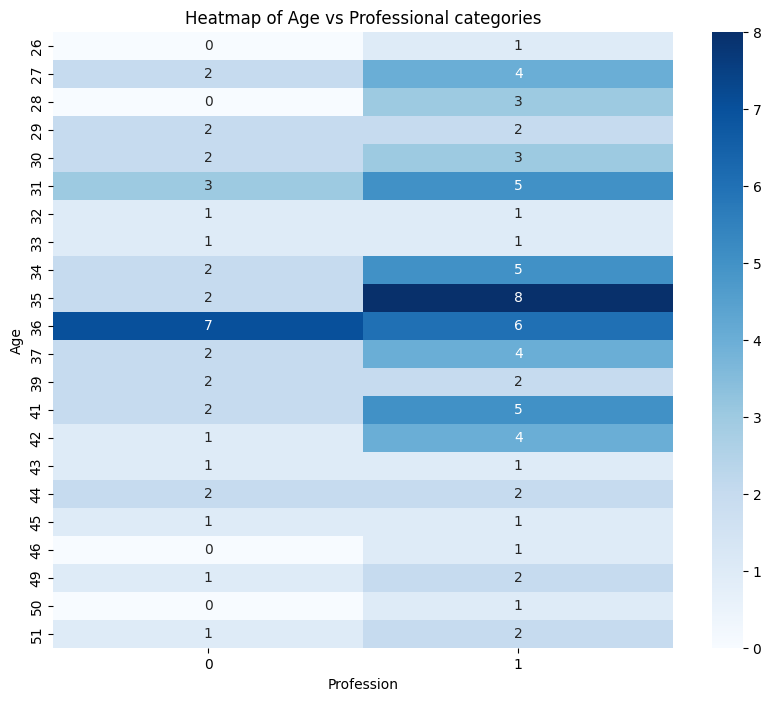

In [19]:
#Analysis of dataset2
df2 = pd.read_csv('behavioural_segment_data.csv')
# Replace salaried with 1 and Business with 0
df2 = df2.replace('Salaried',1).replace('Business',0)
# Creating a pivot table
pivot_df = pd.pivot_table(df2, index='Age', columns= 'Profession',aggfunc='size',fill_value=0)
plt.figure(figsize=(10,8))
sns.heatmap(pivot_df,annot=True,cmap='Blues')
plt.title('Heatmap of Age vs Professional categories')
plt.xlabel('Profession')
plt.ylabel('Age')
plt.show()

#conclusion
There is no single person after the age of 32 years.

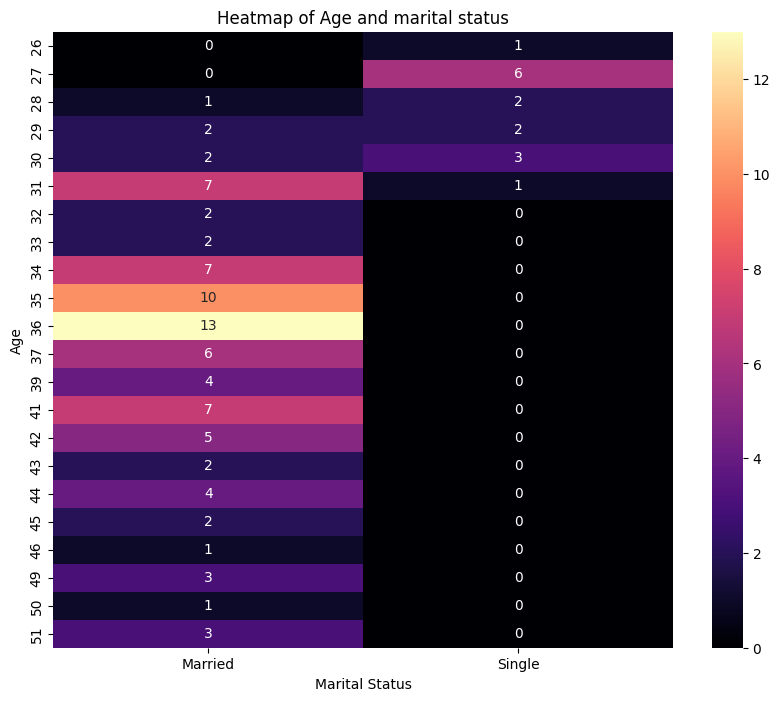

In [20]:
#Analysis of Dataset2
df2 = pd.read_csv('behavioural_segment_data.csv')
pivot_df = pd.pivot_table(df2, index='Age', columns= 'Marrital Status',aggfunc='size',fill_value=0)
plt.figure(figsize=(10,8))
sns.heatmap(pivot_df,annot=True,cmap='magma')
plt.title('Heatmap of Age and marital status')
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.show()

# Conclusion
Salaried Professionals are more than business persons in both Graduated and post graduated level of education.

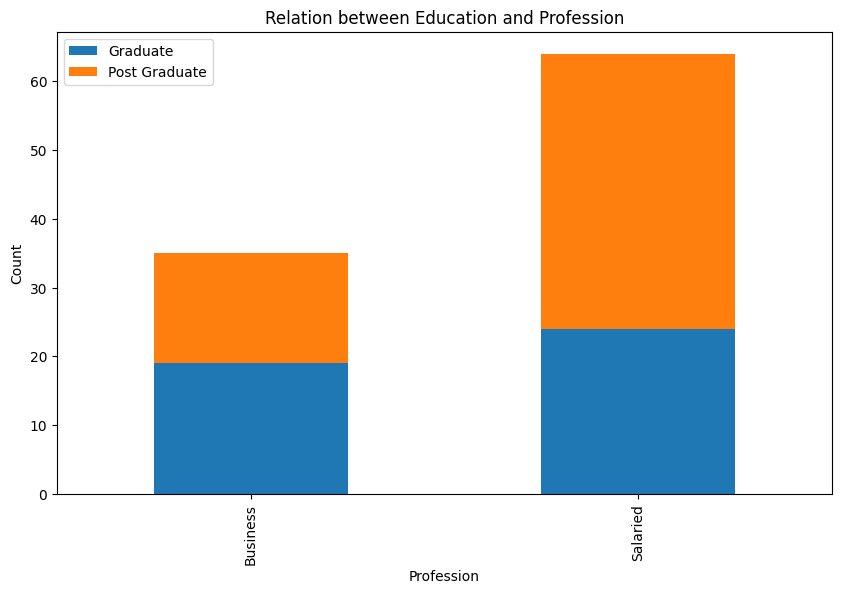

In [21]:
# analysis of dataset2
df2 = pd.read_csv('behavioural_segment_data.csv')
age_edu_counts = df2.groupby(['Profession','Education']).size().reset_index(name='Count')
pivot_df2 = age_edu_counts.pivot(index='Profession',columns='Education', values='Count')
pivot_df2.plot(kind='bar',stacked=True,figsize=(10,6))
plt.title('Relation between Education and Profession')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.legend()
plt.show()

# conclusion 
Personal loan taken by individuals is less after 36 years of age.

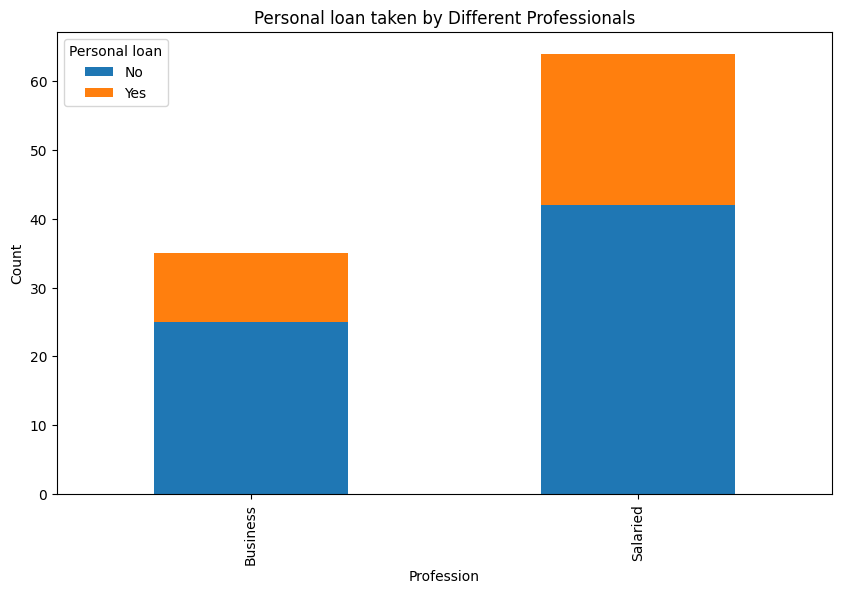

In [22]:
# Analysis of 
df2 = pd.read_csv('behavioural_segment_data.csv')
age_edu_counts = df2.groupby(['Profession','Personal loan']).size().reset_index(name='Count')
# Creating Stacked bar chart of personal loan vs Individual Age
pivot_df2 = age_edu_counts.pivot(index='Profession',columns='Personal loan', values='Count')
pivot_df2.plot(kind='bar',stacked=True,figsize=(10,6))
plt.title('Personal loan taken by Different Professionals')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.legend(title="Personal loan")
plt.show()

Correlation Coefficient: 0.19957025874632542


C:\Users\Admin\AppData\Local\Temp\ipykernel_14600\1161676335.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2 = df2.replace('Salaried',1).replace('Business',0)


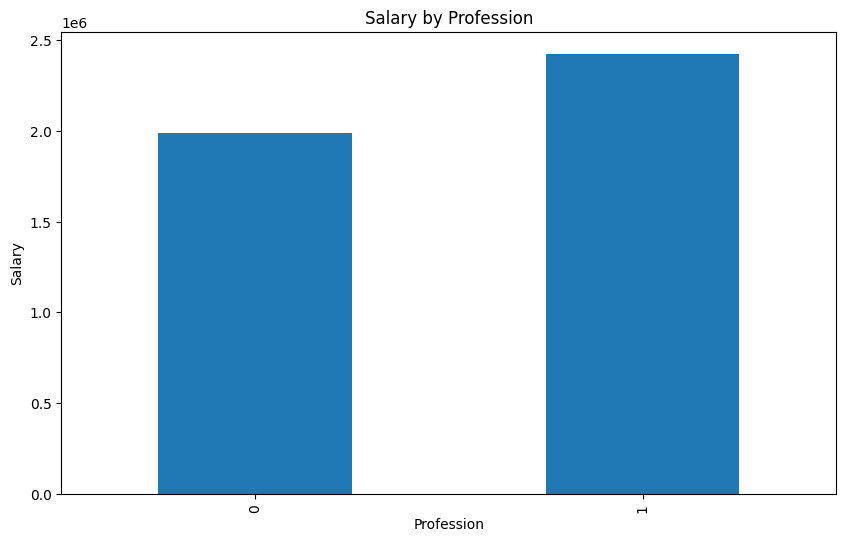

<Figure size 1000x600 with 0 Axes>

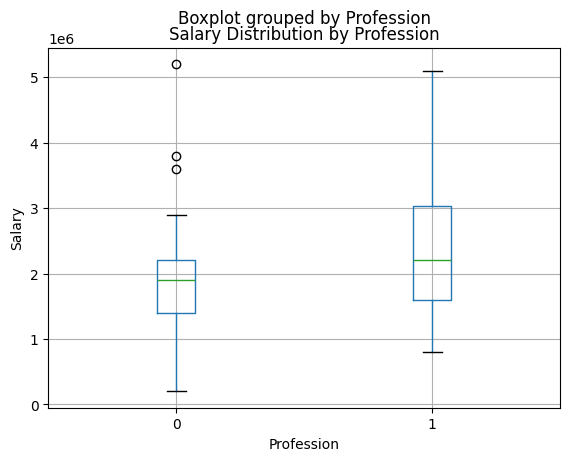

In [23]:
# Calculate the correlation coefficient
# Replace salaried with 1 and Business with 0
df2 = df2.replace('Salaried',1).replace('Business',0)
corr_coef = df2['Profession'].corr(df2['Total Salary'])
print('Correlation Coefficient:', corr_coef)

# Create a bar chart
plt.figure(figsize=(10, 6))
df2.groupby('Profession')['Total Salary'].mean().plot(kind='bar')
plt.title('Salary by Profession')
plt.xlabel('Profession')
plt.ylabel('Salary')
plt.show()

# Create a box plot
plt.figure(figsize=(10, 6))
df2.boxplot(column='Total Salary', by='Profession')
plt.title('Salary Distribution by Profession')
plt.xlabel('Profession')
plt.ylabel('Salary')
plt.show()

#Model Building Using k-Means Clustering

In [35]:
# encoding the categorical features  
# Personal loan feature
df2['Personal loan'].replace(to_replace=['Yes','No'], value=[1,0],inplace=True)
# Profession feature
df2['Profession'].replace(to_replace=['Salaried','Business'],value=[1,0],inplace=True)
df2['Marrital Status'].replace(to_replace=['Married','Single'],value=[1,0],inplace=True)
df2['Education'].replace(to_replace=['Graduate','Post Graduate'],value=[1,2],inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14600\1497844532.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Profession'].replace(to_replace=['Salaried','Business'],value=[1,0],inplace=True)


In [36]:
# selecting features for model building
X =df2[['Age','Profession','Marrital Status','Education','No of Dependents','Personal loan','Total Salary','Price'
        ]]

In [37]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
#Applying Principle Component Analysis (PCA)
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-3.456779,-0.618798,1.775729,-0.151357,1.047749,0.231056,0.256545,-0.154749
1,-0.274146,0.658946,1.695786,-0.042108,0.291098,-0.405744,-0.405434,-0.339778
2,0.879912,2.388637,-0.925667,-0.363319,1.116538,0.453815,0.486613,-0.524482
3,0.771649,0.376038,-0.757106,1.685393,0.163439,-0.046867,0.143957,-0.072337
4,0.219923,-0.252808,1.513077,-0.399144,0.710610,0.056085,-1.392625,-0.544492


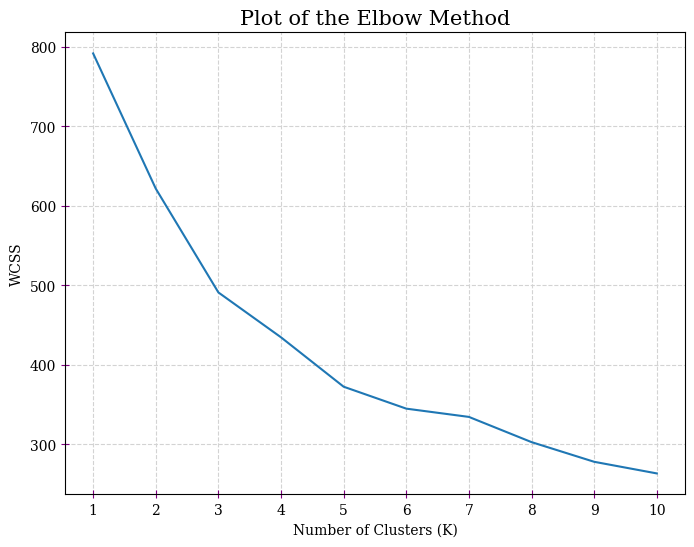

In [45]:
# Plotting the results of Elbow
wcss = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i,init='k-means++',random_state=80)
    kmean.fit(X_pca)
    wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11),family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Clusters (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [46]:
# Training the model using k=5 as rendered by the above plot
kmean = KMeans(n_clusters=5, init='k-means++', random_state=90)
kmean.fit(X_pca)

KMeans(n_clusters=5, random_state=90)

In [47]:
# check the labels assigned to each data point
print(kmean.labels_)

[3 1 1 1 2 1 2 1 1 1 2 1 3 4 1 0 3 4 3 2 2 1 2 1 1 2 1 1 1 2 1 2 0 2 1 0 2
 2 3 2 1 2 2 2 1 2 1 2 2 1 1 0 0 0 0 0 2 3 4 4 3 3 4 1 2 1 1 2 0 2 2 0 2 2
 2 0 1 2 0 0 1 0 1 0 1 1 4 2 2 1 2 0 2 3 4 0 1 0 1]


In [48]:
# check the size of clusters
pd.Series(kmean.labels_).value_counts()

1    33
2    32
0    18
3     9
4     7
Name: count, dtype: int64

In [49]:
# adding a new feature of cluster labels to the dataset 2
df2['clusters'] = kmean.labels_

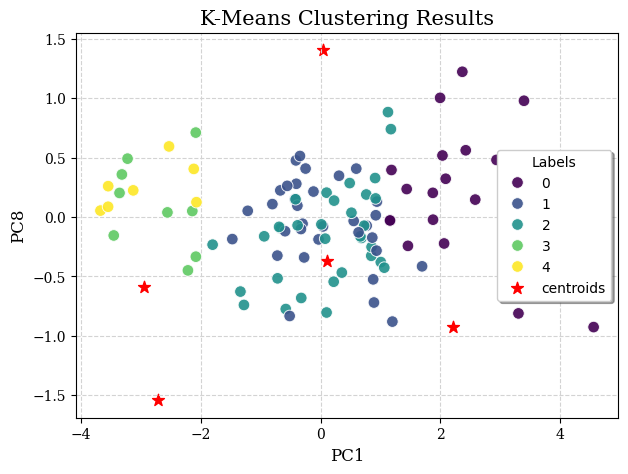

In [50]:

# visualizing clusters
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC8', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC8', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()